<a href="https://colab.research.google.com/github/Shahilasulthana/Computer-Vision/blob/main/Image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving Mona_Lisa_image.webp to Mona_Lisa_image.webp


{'Mona_Lisa_image.webp': b'RIFF\xa2X\x00\x00WEBPVP8X\n\x00\x00\x00\x08\x00\x00\x00]\x01\x00\x11\x02\x00VP8 \xc2W\x00\x00\xf0k\x01\x9d\x01*^\x01\x12\x02>Q"\x8fE\xa3\xa1\xa1!%\x10k0p\n\tila\xfb\xbb\x16v\xc2\xab\x0c\x8a\x00\xd9\xee\tGc\x12\x9a\xe3\x8b\xe2T\xad\xc9T|\xd4\xba$O\x91\xe8>?\xbe\x9d\xfd\x0fz\xff\x9f\xfd\xe7\xfe_9\x0cU\xf7\t\xa8\xd7\x96\xf9\xe5\xffG\xc0\x1f\xd8<H1\x97\xb5\x18\x08w\x0bN\xceN\xbf\xf8\xfc\x9f?\x1f\xffo\xa6\x17\xc3\'\xef?\xf8=\x8f\xffn=)\xfa\x8a\xc8\xe50-\x8d\x81\x97K\x88\xb6\x1c\x9d,\x84\xbc\xbe\x83M\x9a\x94?\x12\xa7\xd4\xbe\x1c\'\x11J*\xffRx\xc6\x07\xfb\xbf\xdc\x8ed^f\x9f4\xef\x83_v\xe7\xdf>\xb8l\\\xdc\xff8\xb3\xccX\xfa\x1e\xaa\xe3\xbb\xefD\x87Gw\xd7_\xbb\xac7\x96\x19\x07\xc9\xb3\\JB\x11\xed,\x10\x90\xd2\xe4\xf3\x99\xbe\xaf\xc7\xf9*\xf8m\x83`\xf4_#\xf9e4+:\x8ci\xf9\xd6\n/\x9a\x003`3\xfdm\x89\x95\xf6\x1e\xa7\x84q>\xe4n\xe6\xd4X\x83\x8d\xd7\xee\xdf\xf6ZE\xfd\xd6\xd9\xba\x81\x83c\xdf\x12\xb6\xba:\xc3\xf8"\x1dA\\$h\xdcJ\x95\x9e\xf8zc.\tl\x8d\x87>w?-\xedE\n\x95[\xb2\x0

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error


In [ ]:
img = cv2.imread("Mona_Lisa_image (1).webp", cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not loaded properly!")

img = img.astype(np.float32) / 255.0


In [ ]:
def add_gaussian(img):
    return random_noise(img, mode='gaussian', var=0.001)

def add_rayleigh(img):
    noise = np.random.rayleigh(scale=0.05, size=img.shape)
    return np.clip(img + noise, 0, 1)

def add_erlang(img):
    noise = np.random.gamma(shape=2.0, scale=0.05, size=img.shape)
    return np.clip(img + noise, 0, 1)

def add_exponential(img):
    noise = np.random.exponential(scale=0.05, size=img.shape)
    return np.clip(img + noise, 0, 1)

def add_uniform(img):
    noise = np.random.uniform(low=-0.05, high=0.05, size=img.shape)
    noisy = img + noise
    return np.clip(noisy, 0, 1)

def add_salt_pepper(img):
    return random_noise(img, mode='s&p', amount=0.01)

In [ ]:
def mean_filter(img):
    return cv2.blur(img, (5, 5))

def median_filter(img):
    img_uint8 = (img * 255).astype(np.uint8)
    den = cv2.medianBlur(img_uint8, 5)
    return den.astype(np.float32) / 255.0

def gaussian_filter(img):
    return cv2.GaussianBlur(img, (5, 5), 0)


In [ ]:
noise_types = {
    "Gaussian": add_gaussian,
    "Rayleigh": add_rayleigh,
    "Erlang (Gamma)": add_erlang,
    "Exponential": add_exponential,
    "Uniform": add_uniform,
    "Salt & Pepper": add_salt_pepper
}

filters = {
    "Mean Filter": mean_filter,
    "Median Filter": median_filter,
    "Gaussian Filter": gaussian_filter
}


In [ ]:
def visualize(original, noisy, denoised, noise_name, filter_name):
    plt.figure(figsize=(9,3))

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title(f"{noise_name} Noise")
    plt.imshow(noisy, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.title(f"Denoised ({filter_name})")
    plt.imshow(denoised, cmap='gray')
    plt.axis('off')

    plt.show()


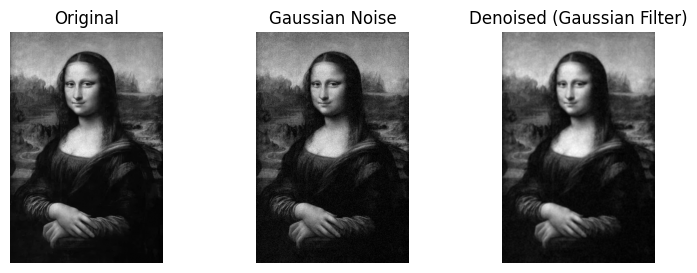

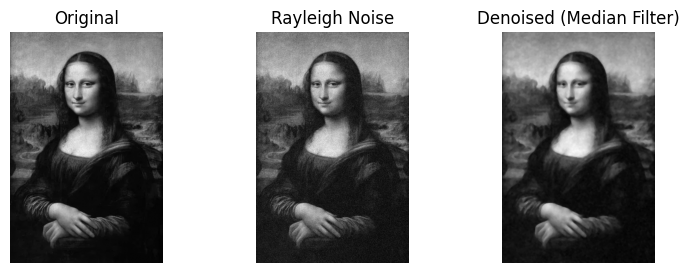

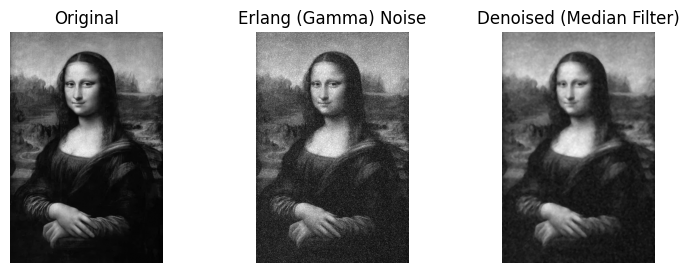

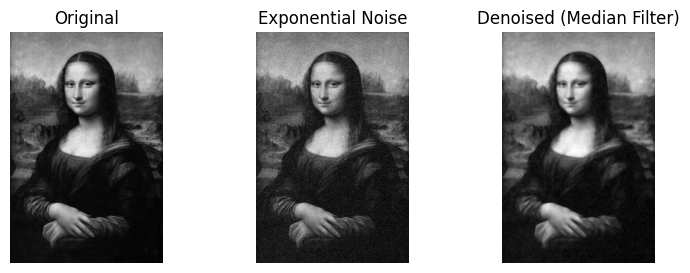

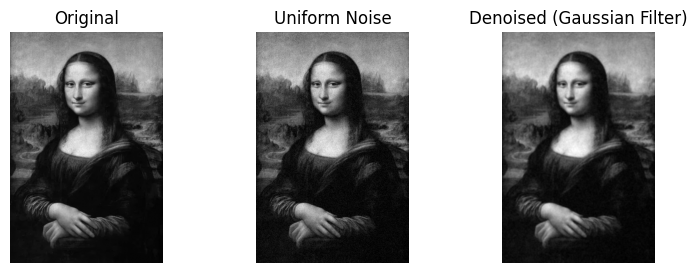

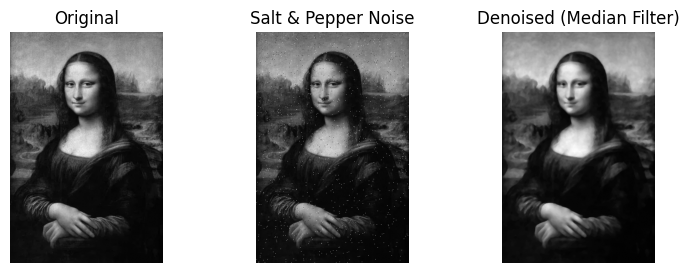

In [ ]:
results = []

for noise_name, noise_func in noise_types.items():

    noisy_img = noise_func(img)

    best_psnr = -1
    best_filter = ""
    best_denoised = None

    for filter_name, filter_func in filters.items():
        denoised = filter_func(noisy_img)

        psnr = peak_signal_noise_ratio(img, denoised, data_range=1.0)
        mse = mean_squared_error(img, denoised)

        results.append([noise_name, filter_name, psnr, mse])

        if psnr > best_psnr:
            best_psnr = psnr
            best_filter = filter_name
            best_denoised = denoised

    visualize(img, noisy_img, best_denoised, noise_name, best_filter)


In [ ]:
df = pd.DataFrame(results, columns=["Noise Type", "Filter", "PSNR", "MSE"])

best_filters = df.loc[df.groupby("Noise Type")["PSNR"].idxmax()]
best_filters


,Noise Type,Filter,PSNR,MSE
7,Erlang (Gamma),Median Filter,20.929619,0.008073
10,Exponential,Median Filter,26.939729,0.002023
2,Gaussian,Gaussian Filter,34.146083,0.000385
4,Rayleigh,Median Filter,24.065646,0.003921
16,Salt & Pepper,Median Filter,33.309054,0.000467
14,Uniform,Gaussian Filter,34.242257,0.000377
